### Importing Libaries

In [237]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso


In [238]:
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [239]:
#loading the dataset to a pandas Dataframe
heart_data = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\heart_disease_data.csv")

In [240]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [241]:
 #print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [242]:
# Number of rows and columns
heart_data.shape

(303, 14)

In [243]:
# Getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [244]:
# Statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [245]:
# Checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking Outliers

In [246]:
# Number of rows and columns
heart_data.shape

(303, 14)

## Visualization

In [247]:
data = heart_data.copy()

In [248]:
data.target=data.target.map({0:'Absence',1:'Presence'})

<Axes: xlabel='count', ylabel='target'>

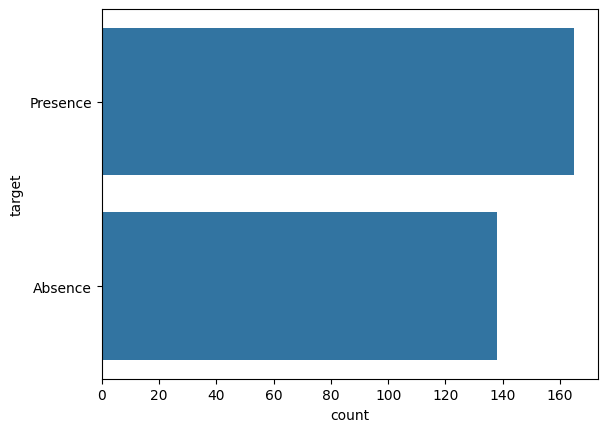

In [249]:
sns.countplot(data.target)

In [250]:
data1=heart_data.copy()

In [251]:
data1.sex=data1.sex.map({0:'Male',1:'Female'})

<Axes: xlabel='sex', ylabel='count'>

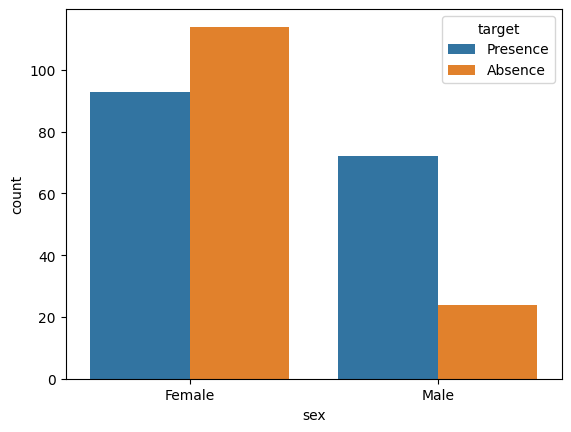

In [252]:
sns.countplot(x=data1.sex,hue=data.target)

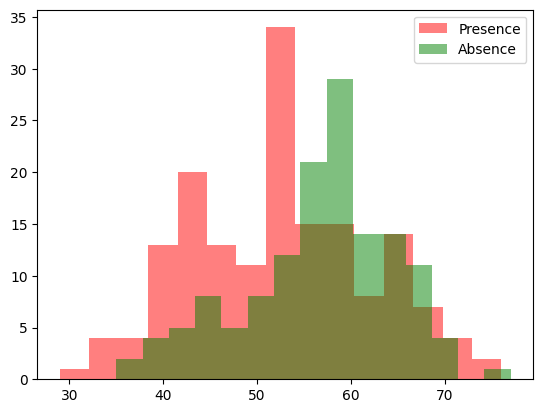

In [253]:
plt.hist(data[data.target=='Presence']['age'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['age'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Looks like age range 40 to 60 have lot of risk of having disease

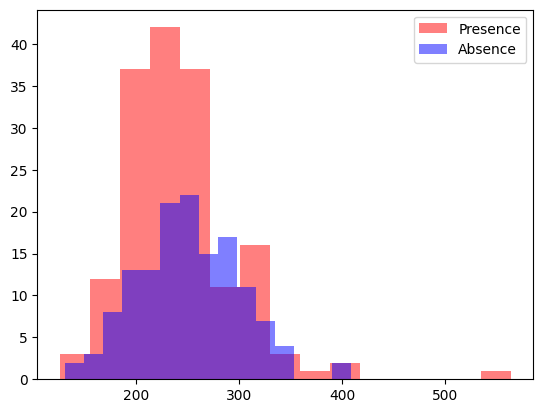

In [254]:
plt.hist(data[data.target=='Presence']['chol'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['chol'],color='b',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Serum Cholestoral level between 200 to 380 mg/dl have high risk of disease

<Axes: xlabel='ca', ylabel='count'>

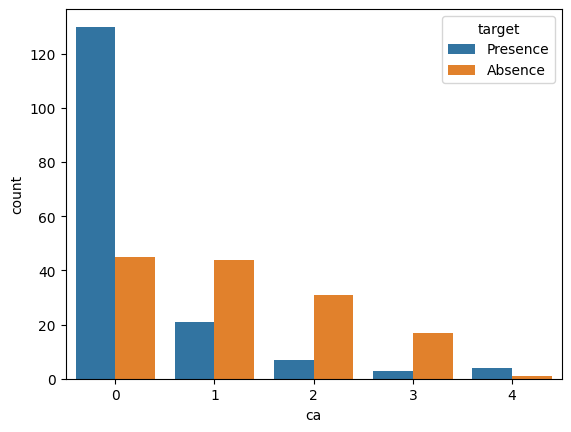

In [255]:
sns.countplot(x=data.ca,hue=data.target)

Less number of major vessels colored by flourosopy have risk of having the disease

In [256]:
# Checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target

In [257]:
X = heart_data.drop(columns='target', axis=1)

In [258]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [259]:
y = heart_data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting the Data into Training data & Test Data

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [261]:
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape)
print(Y_test.shape)

(227, 13)
(76, 13)
(227,)
(76,)


In [262]:
print(heart_data.shape)
print((303)*25/100) #25 % data is test_data 

(303, 14)
75.75


## Define a functions which Depicts a Model Performance and their Scores

In [263]:
def reg_evaluation_metrics(y,ypred):
    mae=mean_absolute_error(y,ypred)
    mse=mean_squared_error(y,ypred)
    Rmse=np.sqrt(mean_squared_error(y,ypred))
    R2_scores=r2_score(y,ypred)
    
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',Rmse)
    print('R2_score',R2_scores)

In [264]:
def train_test_score(model):
    print('Traning score',model.score(X_train,Y_train))
    print('Testing score',model.score(X_test,Y_test))

In [265]:
def reg_coeff_intercept(model):
    print('model_Coefficient',model.coef_)
    print('model_intercept_',model.intercept_)

### Perform Linear Regression

In [266]:
l1=LinearRegression()
l1.fit(X_train,Y_train)



LinearRegression()

In [267]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [268]:
train_test_score(l1)

Traning score 0.5263883193613788
Testing score 0.4502986995410625


In [269]:
lin_reg_ypred=l1.predict(X_test)
lin_reg_ypred[:10]

array([ 0.05938861,  0.73169706,  0.74530895,  0.01192266,  0.27015107,
        0.48974389,  0.17055378,  0.26036356, -0.17464662, -0.22499426])

In [270]:
reg_evaluation_metrics(Y_test,lin_reg_ypred) # Linear Regression Scores

MAE 0.304550544922132
MSE 0.13504607779626596
RMSE 0.3674861600064225
R2_score 0.4502986995410625


In [271]:
reg_coeff_intercept(l1)

model_Coefficient [-0.00068667 -0.24518362  0.11310132 -0.00151499 -0.00046024 -0.0629111
  0.01071036  0.00287423 -0.14534364 -0.06688993  0.03651164 -0.10438369
 -0.09318139]
model_intercept_ 0.8812062980222333


## Perform Lasso Regression

In [272]:
las_reg=Lasso(alpha=20)
las_reg.fit(X_train,Y_train)

y_pred_lassoreg=las_reg.predict(X_test) # Here we predicted y on the basis of x_test values in lasso_regression
y_pred_lassoreg[::5]

array([0.53744493, 0.53744493, 0.53744493, 0.53744493, 0.53744493,
       0.53744493, 0.53744493, 0.53744493, 0.53744493, 0.53744493,
       0.53744493, 0.53744493, 0.53744493, 0.53744493, 0.53744493,
       0.53744493])

In [273]:
reg_evaluation_metrics(Y_test,y_pred_lassoreg)

reg_coeff_intercept(las_reg)# Lasso doesn't show coefficent values so we did not get coefficient in lasso_regresion becoz its values shrinks into zero

train_test_score(las_reg)

MAE 0.4950730350104336
MSE 0.24647515808675954
RMSE 0.4964626452078339
R2_score -0.003270269985287788
model_Coefficient [-0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0.]
model_intercept_ 0.5374449339207048
Traning score 0.0
Testing score -0.003270269985287788


## Logistic Regression

In [274]:
Lr=LogisticRegression()
Lr.fit(X_train,Y_train)

LogisticRegression()

In [275]:
train_test_score(Lr)

Traning score 0.8546255506607929
Testing score 0.8421052631578947


In [276]:
Log_reg_ypred=Lr.predict(X_test)

In [277]:
Log_reg_ypred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [278]:
reg_evaluation_metrics(Y_test,Log_reg_ypred)

MAE 0.15789473684210525
MSE 0.15789473684210525
RMSE 0.39735970711951313
R2_score 0.3572938689217757


In [279]:
Accuracy=accuracy_score(Y_test,Log_reg_ypred)

In [280]:
Accuracy

0.8421052631578947

## KNN regression

In [281]:
from sklearn.neighbors import KNeighborsRegressor

In [282]:
knn=KNeighborsRegressor(n_neighbors=15)

knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=15)

In [283]:
# predictions of y in knn regression
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([0.2       , 0.6       , 0.46666667, 0.4       , 0.46666667,
       0.6       , 0.46666667, 0.4       , 0.33333333, 0.2       ,
       0.6       , 0.73333333, 0.26666667, 0.86666667, 0.6       ,
       0.53333333, 0.33333333, 0.86666667, 0.2       , 0.86666667,
       0.8       , 0.46666667, 0.2       , 0.33333333, 0.46666667,
       0.13333333, 0.86666667, 0.4       , 0.73333333, 0.66666667,
       0.6       , 0.46666667, 0.6       , 0.46666667, 0.93333333,
       0.4       , 0.2       , 0.66666667, 0.33333333, 0.66666667,
       0.46666667, 0.53333333, 0.86666667, 0.4       , 0.4       ,
       0.46666667, 0.86666667, 0.86666667, 0.4       , 0.86666667,
       0.66666667, 0.4       , 0.66666667, 0.33333333, 0.86666667,
       0.46666667, 0.46666667, 0.86666667, 0.53333333, 0.46666667,
       0.33333333, 0.8       , 0.66666667, 0.66666667, 0.4       ,
       0.73333333, 0.73333333, 0.6       , 0.6       , 0.86666667,
       0.73333333, 0.8       , 0.53333333, 0.53333333, 0.46666

In [284]:
reg_evaluation_metrics(Y_test,y_pred_knn)


train_test_score(knn)
##Finds the Training and testing score 

MAE 0.4070175438596491
MSE 0.20175438596491233
RMSE 0.44917077594709154
R2_score 0.17876438806671324
Traning score 0.2000558591378262
Testing score 0.17876438806671324


In [285]:
dict=({'Linear_Regression':[0.30455054492213246,0.1350460777962661,0.45029869954106194,0.3674861600064227],
       'Lasso_regression':[0.4950730350104336,0.003270269985287788,0.24647515808675954,0.4964626452078339],
       'Logistic_regressor':[0.15789473684210525,0.3572938689217757,0.15789473684210525,0.39735970711951313],
       'KNN_regression':[0.4070175438596491,0.17876438806671324,0.20175438596491233,0.44917077594709154
                                                                                                                              
]})
summary=pd.DataFrame(dict,['MAE','R2_Score','MSE','RMSE'])


summary

,Linear_Regression,Lasso_regression,Logistic_regressor,KNN_regression
MAE,0.304551,0.495073,0.157895,0.407018
R2_Score,0.135046,0.003270,0.357294,0.178764
MSE,0.450299,0.246475,0.157895,0.201754
RMSE,0.367486,0.496463,0.397360,0.449171


## The best fit Model is Logistic regression
 #### So we predict the 'Target' value on data by using KNN model

In [286]:
print(X_train.columns)
print(X_test.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [287]:
print(heart_data.shape)
heart_data.head(2)


(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [288]:
heart_test=heart_data.drop('target',axis=1)

heart_data_predictions=Lr.predict(heart_test)

In [289]:
heart_test['Predicted_target_value']=heart_data_predictions

In [290]:
heart_test.head()   # hence we predicted the values of target by using kNN model which is best fit to our dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Predicted_target_value
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [291]:
heart_test.to_csv('updated_heart_dataset.csv')